In [1]:
import mo.hw1.task2 as t2
import mo.hw1.task1 as t1

#### 2.2 Тестируемая функция и действительное значение минимума:

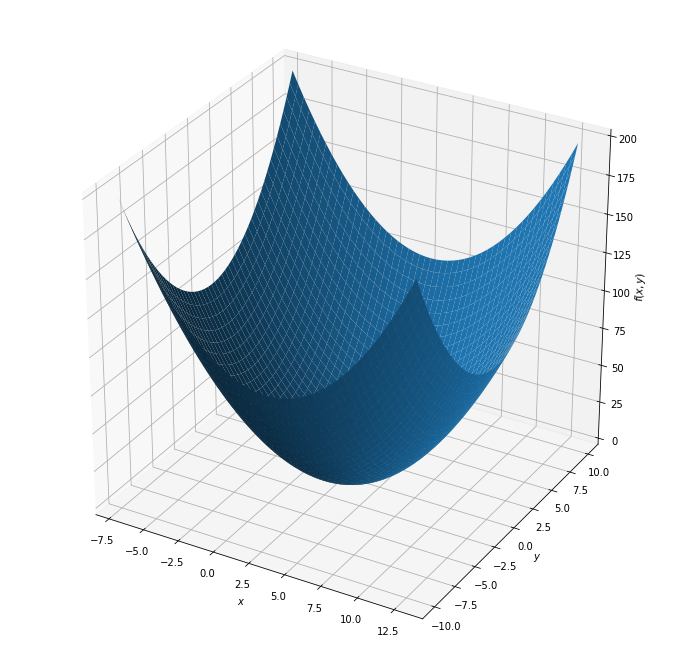

min = (2.9999999999999645, 1.4210854715202004e-13)


In [2]:
def paraboloid(x, y):
    return (x - 3) ** 2 + y ** 2

In [ ]:
fig = t2.plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
x = t2.np.arange(-7.0, 13.0, 0.05)
y = t2.np.arange(-10.0, 10.0, 0.05)
X, Y = t2.np.meshgrid(x, y)
zs = paraboloid(X, Y)

ax.plot_surface(X, Y, zs)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x, y)$')

t2.plt.show()

y_min_idx, x_min_idx = t2.np.unravel_index(zs.argmin(), zs.shape)
min_p = (x[x_min_idx], y[y_min_idx])

print(f'min = {min_p}')



#### 2.3 Графики количества итераций в зависимости от метода одномерной минимизации:

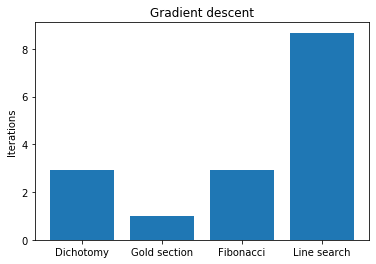

In [9]:
a0, b0 = -100, 100
eps = 1e-3
max_iter_num = 100


def to_step_f(one_dimensional_method, f):
    a, _, _ = one_dimensional_method(f, a0, b0, 1e-5, 100)
    return a[-1]


methods = t1.one_dimensional_methods + [t2.line_search]
methods_range = t2.np.arange(len(methods))
methods_names = list(map(t2.get_name, methods))
x0 = -1e-9
y0 = 1e9

iter_nums = []

n_checks = 25

for method in methods:
    all_iters = 0
    for _ in range(n_checks):
        step_f = t2.partial(to_step_f, method) if method != t2.line_search else method
        _, iter_num = t2.gradient_descent(paraboloid, x0 * t1.np.sqrt(all_iters), y0 * t1.np.sqrt(all_iters), eps=eps,
                                       max_iter_num=max_iter_num, step_f=step_f)
        all_iters += iter_num

    iter_nums.append(all_iters / n_checks)

t2.plt.bar(methods_range, iter_nums)
t2.plt.xticks(methods_range, methods_names)
t2.plt.ylabel('Iterations')
t2.plt.title(t2.get_name(t2.gradient_descent))
t2.plt.show()